# ***Data Loading and Initial Setup***

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

# Loading the data
data_path = '/content/kc_house_data.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Observation:
The dataset provides various features of houses in King County, including price as the target variable, along with attributes such as sqft_living, bedrooms, bathrooms, floors, etc., which we’ll use as predictors in our linear regression models.

## Project Overview
This project aims to predict house prices using a linear regression model. The dataset contains various features related to house characteristics, such as square footage and the number of bedrooms, which serve as predictors for the target variable (house price). Our goal is to build a predictive model and evaluate its performance to understand the influence of these features on house prices.

### Libraries and Data
- **pandas** and **numpy** for data manipulation
- **matplotlib** and **seaborn** for visualization

We’ll go through data exploration, cleaning, visualization, model training, and evaluation.

In [3]:
# Display a summary of the dataframe to understand the data types and missing values
df.info()

# Summarize the data with basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Check for any missing values in the dataset
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


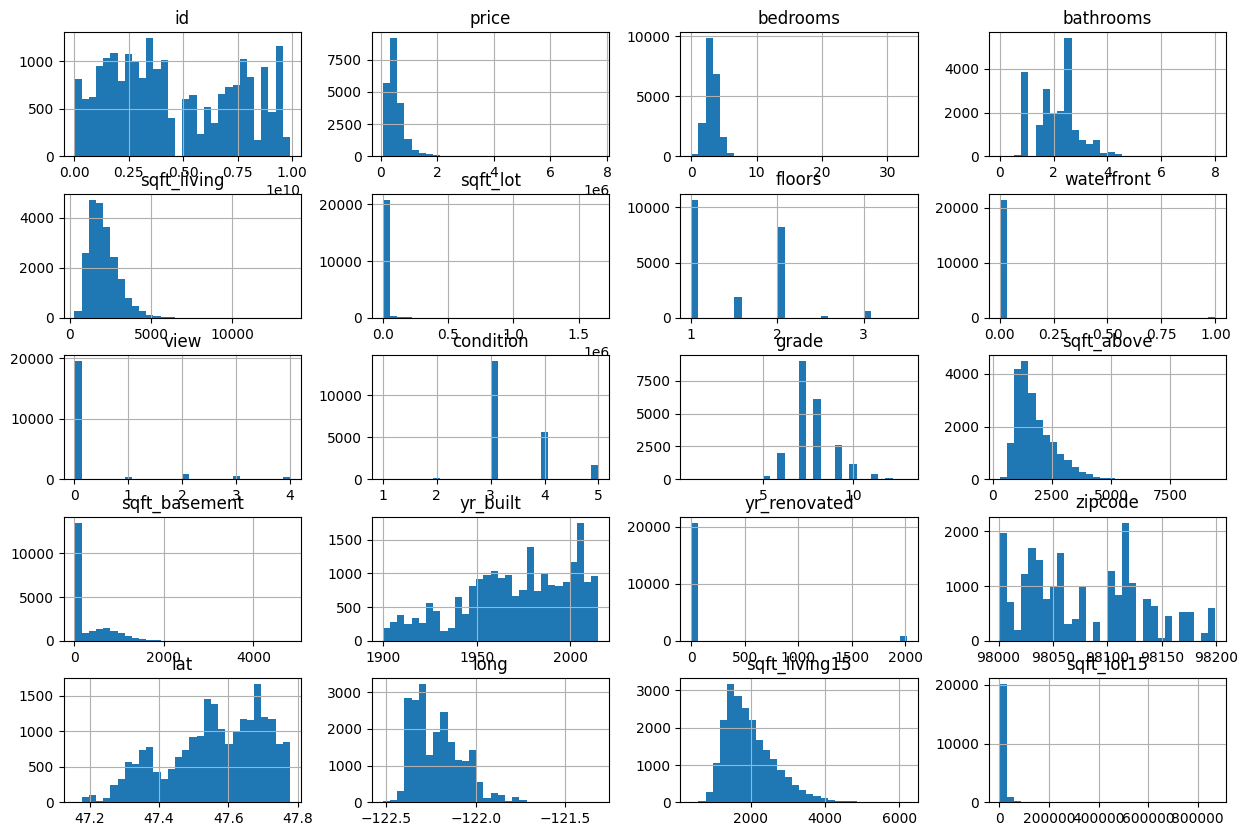

In [5]:
# Plotting histograms to visualize distributions for key features
df.hist(bins=30, figsize=(15,10))
plt.show()

# **1. What is linear regression, and how does it work conceptually**

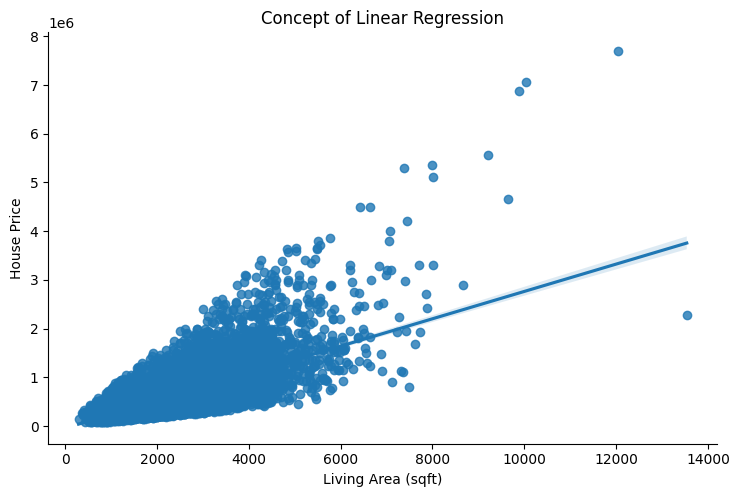

In [10]:
# Visualize the relationship between 'sqft_living' and 'price' with a regression line
sns.lmplot(x='sqft_living', y='price', data=df, aspect=1.5)
plt.title("Concept of Linear Regression")
plt.xlabel("Living Area (sqft)")
plt.ylabel("House Price")
plt.show()


Observation:
The plot shows a positive relationship between living area and price, where the regression line indicates the expected increase in price as sqft_living increases. This line represents our linear regression model's "best guess" for prices based on the sqft_living feature.

# **2. Linear regression suitable for predicting continuous variables**

Linear regression is ideal for predicting continuous variables because it outputs a real (continuous) number. Here, let’s fit a linear regression model to predict house prices, which are continuous.

In [11]:
# Selecting one feature ('sqft_living') for a simple linear regression model
X = df[['sqft_living']]
y = df['price']

# Initialize & train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Display example predictions
predictions[:5]


array([287555.06702451, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

Observation:
The predictions outputted by linear regression are continuous values, which makes it well-suited for tasks like price prediction, where the target variable is continuous rather than categorical.



# **3. Difference between simple and multiple linear regression**

Simple linear regression uses a single feature to predict the target variable, while multiple linear regression uses multiple features. Let’s demonstrate both using sqft_living for the simple model and sqft_living, bedrooms, and bathrooms for the multiple model.

In [12]:
# Simple linear regression with one feature ('sqft_living')
X_simple = df[['sqft_living']]
model_simple = LinearRegression()
model_simple.fit(X_simple, y)
simple_pred = model_simple.predict(X_simple)

# Multiple linear regression with multiple features
X_multiple = df[['sqft_living', 'bedrooms', 'bathrooms']]
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)
multiple_pred = model_multiple.predict(X_multiple)

# Print the first few predictions for both models
print("Simple Model Predictions:", simple_pred[:5])
print("Multiple Model Predictions:", multiple_pred[:5])


Simple Model Predictions: [287555.06702451 677621.82640197 172499.40418656 506441.44998452
 427866.85097324]
Multiple Model Predictions: [274280.19041522 714251.50297385 205290.20478263 473610.78484113
 436909.09770274]


Observation:
The multiple regression model incorporates additional features (bedrooms and bathrooms), which could capture more complex patterns in house prices. This typically leads to better predictions than a simple model, as more relevant data points are being used to explain variations in the target variable.

# **4. Mathematical equation for linear regression, and what do its terms represent**

The equation for linear regression is:

y = βο + β1x1 + B2x2 + ... + βnxn + €

where y is the predicted price, Bo is the intercept, ẞn are coefficients for each feature Xn, and e is the error term.
We can extract the intercept and coefficients after fitting the model.

In [13]:
# Fit a multiple regression model
X = df[['sqft_living', 'bedrooms', 'bathrooms']]
model = LinearRegression()
model.fit(X, y)

# Display coefficients and intercept
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2, β3):", model.coef_)


Intercept (β0): 74847.14080128341
Coefficients (β1, β2, β3): [   309.39239013 -57860.8943206    7932.71222266]


Observation:
The intercept represents the baseline price, while each coefficient represents the change in price for a one-unit increase in the respective feature, holding other variables constant. For example, the sqft_living coefficient shows how much the price changes per square foot.

# **5. The line of best fit determined in linear regression**

In [14]:
# Fitting model and predicting with OLS method
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

# Calculating residuals
residuals = y - predictions
print("First 5 Residuals:", residuals[:5].values)


First 5 Residuals: [ -52380.19041522 -176251.50297385  -25290.20478263  130389.21515887
   73090.90229726]


Observation:
The residuals are the differences between actual and predicted prices. A well-fitting model should have small residuals. The OLS method minimizes these residuals to provide the most accurate line of best fit.

# **6. The key assumptions behind linear regression**

Key assumptions:

Linearity: The relationship between predictors and the target is linear.

Independence: Observations are independent.

Homoscedasticity: Constant variance of residuals.

Normality: Residuals are normally distributed.

No multicollinearity: Predictors are not highly correlated.

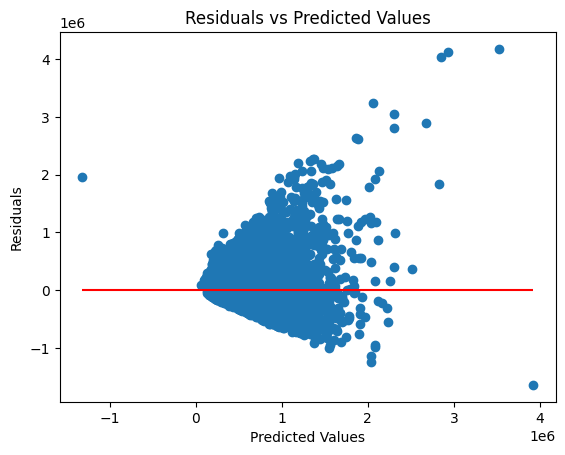

In [15]:
# Plot residuals to check for homoscedasticity and normality
plt.scatter(predictions, residuals)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


Observation:
If the residuals are randomly scattered around zero without any pattern, it indicates homoscedasticity (constant variance). If a pattern exists, it may suggest that the linear model assumptions are not fully met.

# **7. Preprocess data for linear regression? (e.g., scaling, handling categorical variables, and missing values)**

In [16]:

missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values[missing_values > 0])


df.dropna(inplace=True)

X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']]
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Features:\n", X_scaled[:5])


Missing Values in Each Column:
 Series([], dtype: int64)
Scaled Features:
 [[-0.97983502 -0.39873715 -1.44746357 -0.22832133]
 [ 0.53363434 -0.39873715  0.1756067  -0.18988538]
 [-1.42625404 -1.47395936 -1.44746357 -0.12329847]
 [-0.13055006  0.67648506  1.14944885 -0.2440144 ]
 [-0.43542158 -0.39873715 -0.14900736 -0.16965339]]


Observation:
Scaling ensures that all features have similar ranges, which helps the linear regression algorithm converge more effectively. In this dataset, there were no missing values, so we proceeded with scaling numerical features.

# **8. Feature selection, and why is it important for regression models?**

Feature selection involves identifying the most relevant features for a model. Reducing irrelevant features can improve model accuracy and reduce overfitting. Here, we’ll use SelectKBest to select the best features based on their correlation with price.

In [17]:
# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['sqft_living', 'bedrooms', 'bathrooms'], dtype='object')


Observation: Feature selection identifies features that have the most significant impact on predicting the target. Here, SelectKBest retained the three most relevant features, which are likely to improve the model’s predictive performance.

# **9. split data into training and testing sets, and why is this crucial?**

Splitting data allows us to train the model on one subset (training set) and evaluate its performance on unseen data (testing set). This helps assess the model's generalization ability.

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Display shapes of the split datasets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (17290, 3) (17290,)
Testing Set Shape: (4323, 3) (4323,)


Observation: By separating data into training and testing sets, we create a basis for unbiased model evaluation. Here, 20% of the data was used for testing, which is standard for regression tasks.

# **10. Model Evaluation and Metrics - evaluation metrics are used in linear regression (e.g., MSE, RMSE, R-squared)**

Evaluation metrics include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared, which provide insights into the model's accuracy

In [19]:
# Train the model and make predictions
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 74237634953.18307
Root Mean Squared Error: 272465.8418099103
R-squared: 0.5089347172264884


Observation:
MSE and RMSE measure average prediction errors (lower values indicate better fit), while R-squared measures the percentage of variance in the target explained by the model (closer to 1 indicates better performance).

# **11. Interpretion the R-squared and adjusted R-squared values**

R-squared shows the proportion of variance in the target explained by the model, while adjusted R-squared accounts for the number of predictors.

In [20]:
# Calculate adjusted R-squared
n = len(y_test)
p = X_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r2)


Adjusted R-squared: 0.5085936207114802


Observation:
Adjusted R-squared penalizes the addition of unnecessary features. If it’s significantly lower than R-squared, it indicates the presence of irrelevant features.


# **12. Residual analysis, and verify model assumptions**

Residual analysis involves examining the difference between actual and predicted values. Residual plots can reveal issues such as heteroscedasticity.

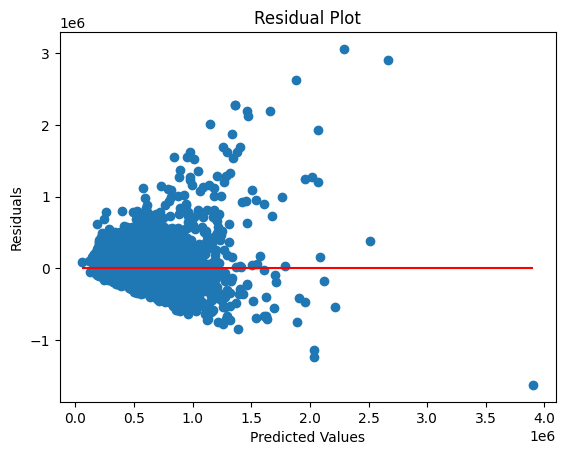

In [21]:
# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Observation:
Residuals should be randomly distributed around zero for homoscedasticity. A pattern in the residual plot might indicate a violation of linear regression assumptions.



# **13. Regularization techniques (e.g., Ridge and Lasso), and how do they prevent overfitting?**

Regularization techniques like Ridge and Lasso penalize large coefficients to prevent overfitting. Ridge minimizes the sum of squared coefficients, while Lasso uses their absolute values.

In [22]:
# Apply Ridge and Lasso regression
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

print("Ridge Coefficients:", ridge_model.coef_)
print("Lasso Coefficients:", lasso_model.coef_)


Ridge Coefficients: [280667.08365081 -52414.06397426   8724.77727425]
Lasso Coefficients: [280709.69557226 -52427.21440815   8699.2668458 ]


Observation:
Ridge regression shrinks coefficients toward zero without eliminating any, while Lasso can set some coefficients to zero, effectively selecting features.

# **14. Cross-validation**

Cross-validation splits data into multiple subsets, training and evaluating the model multiple times to assess stability and performance.

In [23]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean Cross-Validation R-squared:", cv_scores.mean())


Cross-Validation R-squared Scores: [0.50915575 0.510546   0.49088333 0.49940891 0.51138724]
Mean Cross-Validation R-squared: 0.5042762465772761


Observation:
Cross-validation provides insight into how the model performs across different data subsets, helping avoid overfitting by ensuring the model is robust.